In [ ]:
from google.colab import files
uploaded = files.upload()


Saving World Population Data.csv to World Population Data (7).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd
df = pd.read_csv("World Population Data.csv")


In [ ]:
print(df["Yearly Change"])
print(df["Yearly Change"].dtype)

0       0.89 %
1      -0.23 %
2       0.57 %
3       0.82 %
4       1.52 %
        ...   
229    -0.70 %
230    -0.20 %
231     4.55 %
232     0.11 %
233     0.00 %
Name: Yearly Change, Length: 234, dtype: object
object


In [ ]:
print(df["Urban Pop %"])
print(df["Urban Pop %"].dtype)

0      37 %
1      66 %
2      82 %
3      59 %
4      34 %
       ... 
229    11 %
230    68 %
231     0 %
232    44 %
233    N.A.
Name: Urban Pop %, Length: 234, dtype: object
object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


In [ ]:
df.head()

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [ ]:
# Convert "Urban Pop %" to numeric
df["Urban Pop %"] = df["Urban Pop %"].astype(str).str.replace("%", "").str.strip()
df["Urban Pop %"] = pd.to_numeric(df["Urban Pop %"], errors="coerce")  # Convert to float


In [ ]:

# Convert "Yearly Change" to numeric
df["Yearly Change"] = df["Yearly Change"].astype(str).str.replace("%", "").str.strip()
df["Yearly Change"] = pd.to_numeric(df["Yearly Change"], errors="coerce")  # Convert to float


In [ ]:

# Convert "World Share" to numeric
df["World Share"] = df["World Share"].astype(str).str.replace("%", "").str.strip()
df["World Share"] = pd.to_numeric(df["World Share"], errors="coerce")  # Convert to float


In [ ]:

# Check the data types again
print(df[["Urban Pop %", "Yearly Change","World Share"]].dtypes)
print(df["Urban Pop %"])
print(df["Yearly Change"])
print(df["World Share"])

Urban Pop %      float64
Yearly Change    float64
World Share      float64
dtype: object
0      37.0
1      66.0
2      82.0
3      59.0
4      34.0
       ... 
229    11.0
230    68.0
231     0.0
232    44.0
233     NaN
Name: Urban Pop %, Length: 234, dtype: float64
0      0.89
1     -0.23
2      0.57
3      0.82
4      1.52
       ... 
229   -0.70
230   -0.20
231    4.55
232    0.11
233    0.00
Name: Yearly Change, Length: 234, dtype: float64
0      17.78
1      17.39
2       4.23
3       3.47
4       3.08
       ...  
229     0.00
230     0.00
231     0.00
232     0.00
233     0.00
Name: World Share, Length: 234, dtype: float64


In [ ]:
df["Population (2024)"] = df["Population (2024)"].astype(str).str.replace(",", "").astype(float)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
numeric_columns = [
    "Population (2024)", "Net Change", "Density (P/Km²)",
    "Land Area (Km²)", "Migrants (net)", "Fert. Rate", "Med. Age"
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
df = df.dropna(subset=["Population (2024)"])

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
if "Region" not in df.columns:
    country_to_region = {
        "India": "Asia", "China": "Asia", "USA": "North America", "Brazil": "South America",
        "Russia": "Europe", "Japan": "Asia", "Germany": "Europe", "UK": "Europe",
        "France": "Europe", "Pakistan": "Asia", "Bangladesh": "Asia", "Nigeria": "Africa",
        "Mexico": "North America", "Philippines": "Asia", "Egypt": "Africa"
    }
    df["Region"] = df["Country"].map(country_to_region)
    df["Region"].fillna("Other", inplace=True)  # Assign "Other" to unmapped countries

<ipython-input-202-e3ec5588afa7>:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
region_population = df.groupby("Region")["Population (2024)"].sum().reset_index()

In [ ]:
print(df.describe())

             Rank  Population (2024)  Yearly Change  Net Change  \
count  234.000000       2.340000e+02     234.000000  234.000000   
mean   117.500000       3.487407e+07       0.942393    5.683761   
std     67.694165       1.383471e+08       1.367075  177.042278   
min      1.000000       4.960000e+02      -5.040000 -865.000000   
25%     59.250000       4.782600e+05       0.010000    0.000000   
50%    117.500000       5.615064e+06       0.860000    0.000000   
75%    175.750000       2.346508e+07       1.875000    0.000000   
max    234.000000       1.450936e+09       5.070000  858.000000   

       Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fert. Rate  \
count       234.000000       234.000000      234.000000  234.000000   
mean        146.957265        71.692308       13.846154    2.332051   
std         171.658054       183.266052      184.605303    1.163002   
min           0.000000         0.000000     -737.000000    0.700000   
25%          29.000000         0.000000  

In [ ]:
# Extract the top 10 countries by population
top_10 = df.nlargest(10, "Population (2024)")

# Display the result
print(top_10[["Country", "Population (2024)"]])


         Country  Population (2024)
0          India       1.450936e+09
1          China       1.419321e+09
2  United States       3.454266e+08
3      Indonesia       2.834879e+08
4       Pakistan       2.512692e+08
5        Nigeria       2.326795e+08
6         Brazil       2.119986e+08
7     Bangladesh       1.735624e+08
8         Russia       1.448204e+08
9       Ethiopia       1.320598e+08


In [ ]:
import plotly.express as px

fig = px.bar(top_10, x="Country", y="Population (2024)",
             title="Top 10 Most Populated Countries",
             color="Population (2024)", text="Population (2024)")
fig.show()


<ipython-input-207-ba6d0436f142>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




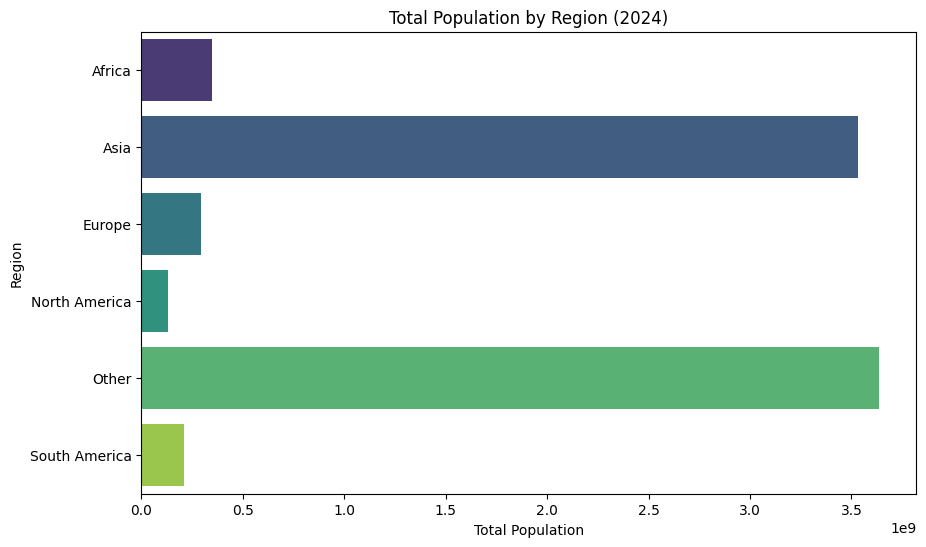

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=region_population, x="Population (2024)", y="Region", palette="viridis")
plt.title("Total Population by Region (2024)")
plt.xlabel("Total Population")
plt.ylabel("Region")
plt.show()

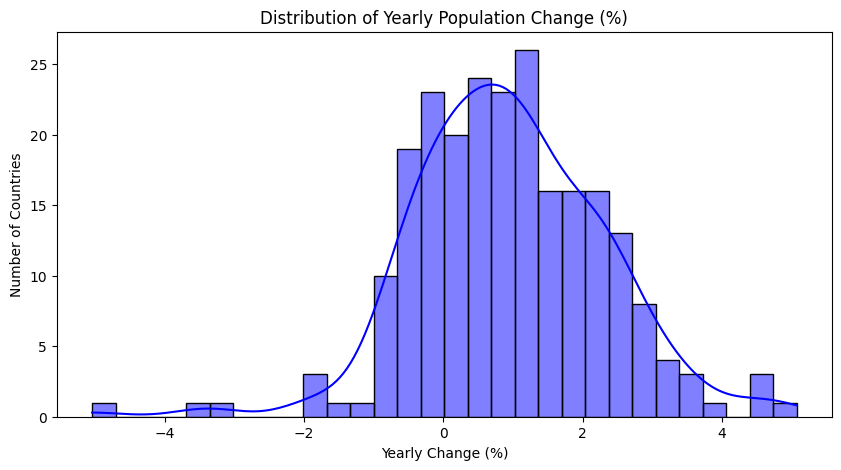

In [ ]:
# Yearly Change Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Yearly Change"], bins=30, kde=True, color="blue")
plt.title("Distribution of Yearly Population Change (%)")
plt.xlabel("Yearly Change (%)")
plt.ylabel("Number of Countries")
plt.show()

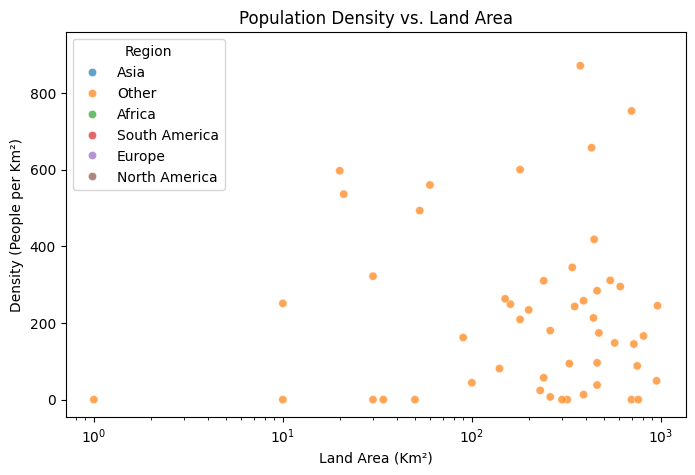

In [ ]:
# Population Density vs. Land Area
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Land Area (Km²)", y="Density (P/Km²)", hue="Region", alpha=0.7)
plt.xscale("log")
plt.title("Population Density vs. Land Area")
plt.xlabel("Land Area (Km²)")
plt.ylabel("Density (People per Km²)")
plt.show()

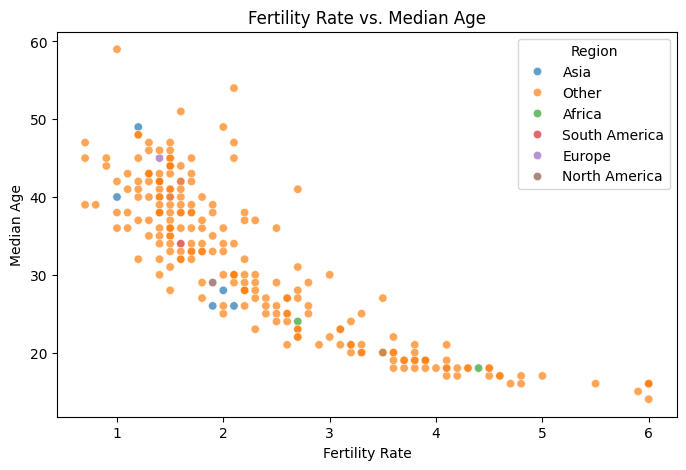

In [ ]:

# Fertility Rate vs. Median Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Fert. Rate", y="Med. Age", hue="Region", alpha=0.7)
plt.title("Fertility Rate vs. Median Age")
plt.xlabel("Fertility Rate")
plt.ylabel("Median Age")
plt.show()

In [ ]:
fig = px.scatter(df,
                 x="Population (2024)",
                 y="Urban Pop %",
                 size="World Share",
                 color="Region",
                 hover_name="Country",
                 log_x=True,
                 size_max=60,
                 title="Urban Population Percentage vs. Total Population")

# Show the plot
fig.show()